In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
import graphviz

In [68]:
df= pd.read_csv("data/mfg_df_ratio_machine2.csv", encoding="cp949")
df.head()

,LOT_ID,명점,양품,불량률,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,...,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,LOT-101,2,18,0.10,2호기,2호기,1호기,1호기,2호기,1호기,...,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,LOT-102,1,19,0.05,1호기,1호기,2호기,1호기,2호기,1호기,...,3호기,2호기,1호기,2호기,1호기,1호기,2호기,3호기,2호기,2호기
2,LOT-103,3,17,0.15,2호기,2호기,1호기,1호기,2호기,2호기,...,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,2호기,2호기
3,LOT-104,0,20,0.00,1호기,1호기,2호기,2호기,1호기,2호기,...,3호기,2호기,1호기,2호기,1호기,1호기,1호기,2호기,2호기,1호기
4,LOT-105,2,18,0.10,2호기,1호기,1호기,1호기,1호기,1호기,...,1호기,2호기,1호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기


In [12]:
df_machine=df[['불량률','MC_1BLACK_1PRINT',
'MC_1BLACK_2RTD',
'MC_2AG_1PRINT',
'MC_2AG_2RTD',
'MC_2AG_3EXPOSURE',
'MC_3BUS_1DEVELOP',
'MC_3BUS_2FIRE',
'MC_4DIELEC_1FIRE',
'MC_5MGO',
'MC_6PHOS_1R_1DISPENSER',
'MC_6PHOS_1R_2DRY',
'MC_6PHOS_2G_1DISPENSER',
'MC_6PHOS_2G_2DRY',
'MC_6PHOS_3B_1DISPENSER',
'MC_6PHOS_4FIRE',
'MC_7PASTE',
'MC_8AGING',
]]

In [13]:
df_machine.head()

,불량률,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,10%,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,5%,1호기,1호기,2호기,1호기,2호기,1호기,2호기,3호기,2호기,1호기,2호기,1호기,1호기,2호기,3호기,2호기,2호기
2,15%,2호기,2호기,1호기,1호기,2호기,2호기,2호기,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,2호기,2호기
3,0%,1호기,1호기,2호기,2호기,1호기,2호기,1호기,3호기,2호기,1호기,2호기,1호기,1호기,1호기,2호기,2호기,1호기
4,10%,2호기,1호기,1호기,1호기,1호기,1호기,1호기,1호기,2호기,1호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기


In [76]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import DecisionTreeClassifier

In [15]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#export_graphviz: 나무구조 생성및 저장
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

matplotlib.rc('font', family = 'NanumSquare')
plt.rc('font', family = 'NanumSquare')

In [69]:
df_machine.head()

,불량률,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,10%,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,5%,1호기,1호기,2호기,1호기,2호기,1호기,2호기,3호기,2호기,1호기,2호기,1호기,1호기,2호기,3호기,2호기,2호기
2,15%,2호기,2호기,1호기,1호기,2호기,2호기,2호기,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,2호기,2호기
3,0%,1호기,1호기,2호기,2호기,1호기,2호기,1호기,3호기,2호기,1호기,2호기,1호기,1호기,1호기,2호기,2호기,1호기
4,10%,2호기,1호기,1호기,1호기,1호기,1호기,1호기,1호기,2호기,1호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기


In [70]:
df_machine_y = df[["불량률"]]
df_machine_y

,불량률
0,0.10
1,0.05
2,0.15
3,0.00
4,0.10
...,...
195,0.15
196,0.10
197,0.20
198,0.20


In [71]:
df_machine_x = df_machine.drop("불량률", axis=1, inplace=False)
df_machine_x

,MC_1BLACK_1PRINT,MC_1BLACK_2RTD,MC_2AG_1PRINT,MC_2AG_2RTD,MC_2AG_3EXPOSURE,MC_3BUS_1DEVELOP,MC_3BUS_2FIRE,MC_4DIELEC_1FIRE,MC_5MGO,MC_6PHOS_1R_1DISPENSER,MC_6PHOS_1R_2DRY,MC_6PHOS_2G_1DISPENSER,MC_6PHOS_2G_2DRY,MC_6PHOS_3B_1DISPENSER,MC_6PHOS_4FIRE,MC_7PASTE,MC_8AGING
0,2호기,2호기,1호기,1호기,2호기,1호기,1호기,3호기,1호기,1호기,2호기,2호기,2호기,1호기,3호기,1호기,2호기
1,1호기,1호기,2호기,1호기,2호기,1호기,2호기,3호기,2호기,1호기,2호기,1호기,1호기,2호기,3호기,2호기,2호기
2,2호기,2호기,1호기,1호기,2호기,2호기,2호기,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,2호기,2호기
3,1호기,1호기,2호기,2호기,1호기,2호기,1호기,3호기,2호기,1호기,2호기,1호기,1호기,1호기,2호기,2호기,1호기
4,2호기,1호기,1호기,1호기,1호기,1호기,1호기,1호기,2호기,1호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2호기,1호기,2호기,1호기,2호기,2호기,2호기,3호기,1호기,2호기,1호기,2호기,1호기,2호기,3호기,1호기,1호기
196,1호기,2호기,1호기,2호기,2호기,1호기,2호기,3호기,1호기,1호기,1호기,1호기,2호기,1호기,2호기,2호기,1호기
197,2호기,2호기,2호기,2호기,1호기,2호기,2호기,2호기,1호기,2호기,2호기,2호기,2호기,1호기,3호기,2호기,1호기
198,1호기,1호기,2호기,2호기,2호기,1호기,2호기,1호기,2호기,1호기,1호기,1호기,1호기,1호기,2호기,1호기,2호기


In [72]:
df_machine_x_dummy = pd.get_dummies(df_machine_x)
df_machine_x_dummy.head()

,MC_1BLACK_1PRINT_1호기,MC_1BLACK_1PRINT_2호기,MC_1BLACK_2RTD_1호기,MC_1BLACK_2RTD_2호기,MC_2AG_1PRINT_1호기,MC_2AG_1PRINT_2호기,MC_2AG_2RTD_1호기,MC_2AG_2RTD_2호기,MC_2AG_3EXPOSURE_1호기,MC_2AG_3EXPOSURE_2호기,...,MC_6PHOS_2G_2DRY_2호기,MC_6PHOS_3B_1DISPENSER_1호기,MC_6PHOS_3B_1DISPENSER_2호기,MC_6PHOS_4FIRE_1호기,MC_6PHOS_4FIRE_2호기,MC_6PHOS_4FIRE_3호기,MC_7PASTE_1호기,MC_7PASTE_2호기,MC_8AGING_1호기,MC_8AGING_2호기
0,0,1,0,1,1,0,1,0,0,1,...,1,1,0,0,0,1,1,0,0,1
1,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1
2,0,1,0,1,1,0,1,0,0,1,...,1,1,0,1,0,0,0,1,0,1
3,1,0,1,0,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,1,0
4,0,1,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,1,0


In [73]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_machine_x_dummy, df_machine_y,
                                                               test_size = 0.3, random_state = 1234)

print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (140, 36)
train data Y size : (140, 1)
test data X size : (60, 36)
test data Y size : (60, 1)


In [86]:
tree_uncustomized = DTR(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(tree_uncustomized.score(df_train_x,df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomized.score(df_test_x,df_test_y)))

Score on training set: 1.000
Score on test set: -1.341


In [87]:
#변수명 저장
v_feature_name = df_train_x.columns

In [90]:
train_accuracy = []
test_accuracy =[]
para_split = [n_split * 2 for n_split in range(1,10)]

for v_min_samples_split in para_split:
    tree = DTR(random_state = 1234, max_depth = 3,
                                min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_val_x,df_val_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesLeaf"] = para_split
df_accuracy_split["TrainScore"] = train_accuracy
df_accuracy_split["TestScore"] = test_accuracy
df_accuracy_split.round(3)

ValueError: y_true and y_pred have different number of output (7!=1)

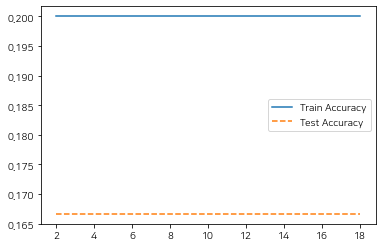

In [39]:
plt.plot(para_split, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

In [49]:
train_accuracy = []
test_accuracy =[]

para_leaf = [n_leaf * 2 for n_leaf in range(1,10)]

for v_min_samples_leaf in para_leaf:
    tree = DTC(random_state = 1234, min_samples_leaf = v_min_samples_leaf, max_depth=7)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_val_x,df_val_y))

df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_accuracy
df_score_leaf["TestScore"] = test_accuracy
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.636,0.567
1,4,0.436,0.450
2,6,0.386,0.367
3,8,0.243,0.217
4,10,0.236,0.150
5,12,0.221,0.150
6,14,0.171,0.133
7,16,0.164,0.150
8,18,0.164,0.150


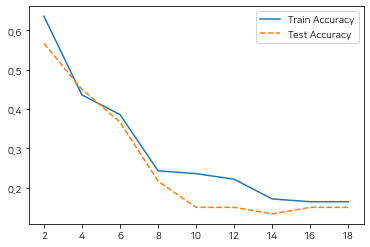

In [50]:
plt.plot(para_leaf, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle ="--", label = "Test Accuracy")
plt.legend()

In [78]:
#최종모델
tree_final = DTR(random_state = 1234, max_depth = 4)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(max_depth=4, random_state=1234)

In [79]:
df_train_y

,불량률
97,0.15
66,0.05
122,0.10
49,0.15
130,0.15
...,...
152,0.10
116,0.15
53,0.00
38,0.15


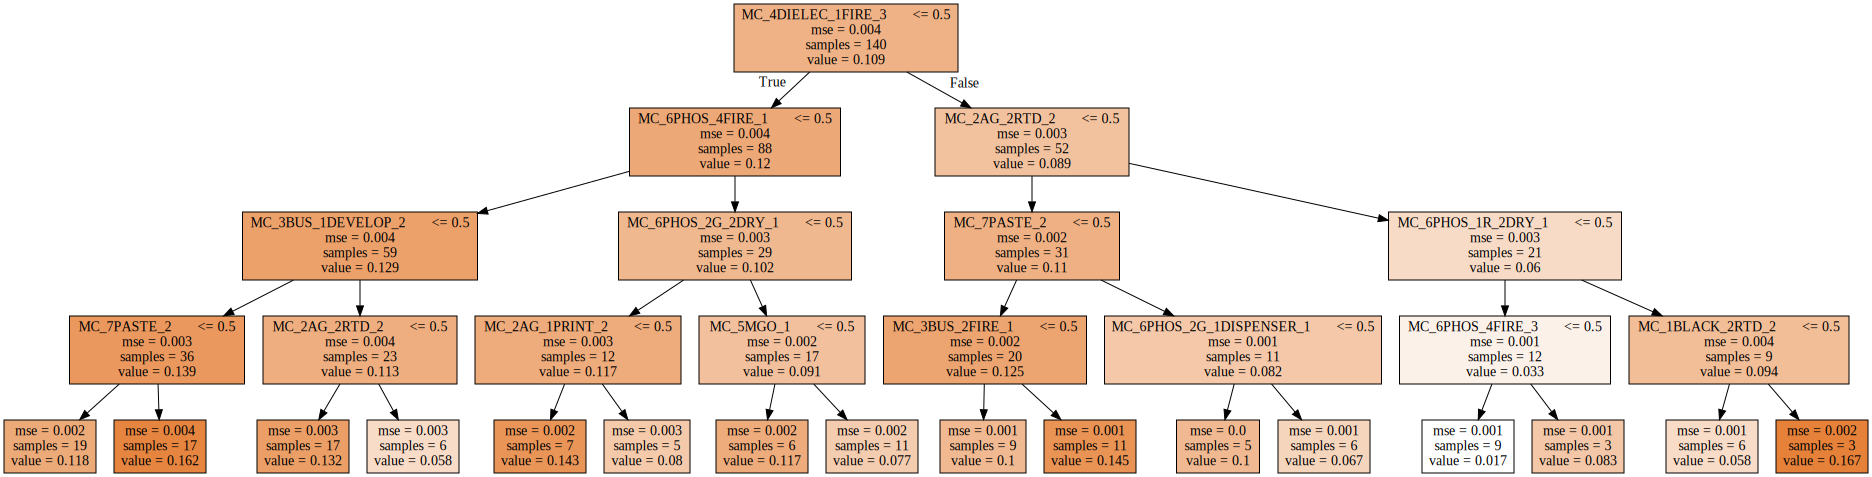

In [80]:
export_graphviz(tree_final, out_file = "tree_final.dot",
                feature_names = v_feature_name, impurity = True, filled= True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [85]:
y_pred = tree_final.predict(df_test_x)
print("Train Accuracy: {0:.3f}\n".format(tree_final.score(df_train_x,df_train_y)), end ="")
print("Test Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x,df_test_y)))
print("Confusion matrix56:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Train Accuracy: 0.443
Test Accuracy: -0.400



ValueError: continuous is not supported

In [57]:
tree_final

DecisionTreeClassifier(max_depth=7, random_state=1234)

In [83]:
#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance7 = df_importance[:10]
df_importance7.round(4)

,Feature,Importance
7,MC_2AG_2RTD_2호기,0.2448
16,MC_4DIELEC_1FIRE_3호기,0.1331
33,MC_7PASTE_2호기,0.1320
3,MC_1BLACK_2RTD_2호기,0.1030
21,MC_6PHOS_1R_2DRY_1호기,0.0843
29,MC_6PHOS_4FIRE_1호기,0.0626
5,MC_2AG_1PRINT_2호기,0.0506
12,MC_3BUS_2FIRE_1호기,0.0449
31,MC_6PHOS_4FIRE_3호기,0.0439
11,MC_3BUS_1DEVELOP_2호기,0.0411


<ipython-input-84-4220fd89893d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance7.sort_values("Importance", ascending = True, inplace = True)


Text(0, 0.5, 'Variable')

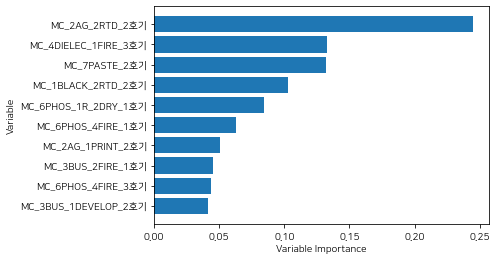

In [84]:
#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance7.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance7))
plt.barh(y= coordinates, width =df_importance7["Importance"])
plt.yticks(coordinates, df_importance7["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

In [47]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeClassifier

In [48]:
# GridSearchCV 이용한 DecisionTreeClassifier 최적의 파라미터 찾기
estimator = DecisionTreeClassifier()

param_grid = {"max_depth" :para_depth, "min_samples_split":para_split,"min_samples_leaf":para_leaf}

grid_dt =GridSearchCV(estimator, param_grid,scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best estimator model :\n{}".format(grid_dt.best_estimator_))
print("\nbest paramator model :\n{}".format(grid_dt.best_params_))
print("\nbest score :\n{}".format(grid_dt.best_score_.round(3)))

best estimator model :
DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=8)

best paramator model :
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 8}

best score :
0.221


# 요약 

<ipython-input-99-4179d47bc250>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_importance7.sort_values("Importance", ascending = True, inplace = True)


Text(0, 0.5, 'Variable')

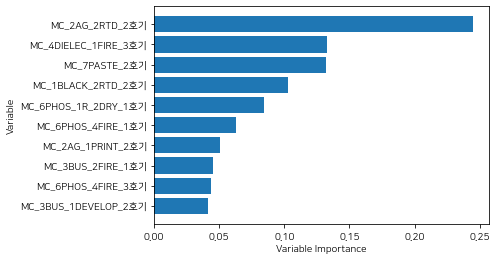

In [99]:
df= pd.read_csv("data/mfg_df_ratio_machine2.csv", encoding="cp949")
df.head()



df_machine=df[['불량률','MC_1BLACK_1PRINT',
'MC_1BLACK_2RTD',
'MC_2AG_1PRINT',
'MC_2AG_2RTD',
'MC_2AG_3EXPOSURE',
'MC_3BUS_1DEVELOP',
'MC_3BUS_2FIRE',
'MC_4DIELEC_1FIRE',
'MC_5MGO',
'MC_6PHOS_1R_1DISPENSER',
'MC_6PHOS_1R_2DRY',
'MC_6PHOS_2G_1DISPENSER',
'MC_6PHOS_2G_2DRY',
'MC_6PHOS_3B_1DISPENSER',
'MC_6PHOS_4FIRE',
'MC_7PASTE',
'MC_8AGING',
]]



df_machine_y = df[["불량률"]]
df_machine_y


df_machine_x = df_machine.drop("불량률", axis=1, inplace=False)
df_machine_x


df_machine_x_dummy = pd.get_dummies(df_machine_x)
df_machine_x_dummy.head()



#최종모델
tree_final = DTR(random_state = 1234, max_depth = 4)
tree_final.fit(df_train_x,df_train_y)


#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending = False, inplace = True)
df_importance7 = df_importance[:10]
df_importance7.round(4)


#설명변수 중요도 그래프
#중요도가 높은 변수를 상위에 그림
df_importance7.sort_values("Importance", ascending = True, inplace = True)
coordinates = range(len(df_importance7))
plt.barh(y= coordinates, width =df_importance7["Importance"])
plt.yticks(coordinates, df_importance7["Feature"])
plt.xlabel("Variable Importance")
plt.ylabel("Variable")

In [97]:
model = ols('불량률 ~ C(MC_1BLACK_2RTD)',df).fit()

print(model)